<a href="https://colab.research.google.com/github/estradajhonatandavid/Maestria-AI./blob/main/Taller_4_Preparaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS DE RIPS**


*Registros Individuales de Prestación de Servicios de Salud :* es un sistema donde se recolecta información detallada sobre cada uno de los servicios de salud que se prestan a los usuarios, como consultas médicas, procedimientos, hospitalizaciones, etc. Cada vez que un prestador de servicios de salud (hospital, clínica, etc.) atiende a un paciente, se genera un registro en el RIPS con todos los datos relevantes de esa atención.

**Pregunta SMART**

¿Cómo puede una empresa de dispotivos médicos predecir con un 85% de precisión la demanda mensual para 2024 de dispositivos para angioplastia coronaria transluminal percutánea (uno o dos vasos) en las cinco ciudades principales del país, utilizando los datos históricos de RIPS, para optimizar la cadena de suministro y reducir el inventario excedente en un 15% ?

*Descripción del problema:* Una empresa de dispositivos médicos enfrenta dificultades para planificar la demanda de dispositivos para angioplastia debido a la variabilidad regional, lo que genera inventarios ineficientes y costos adicionales.

*Justificación del uso de ciencia de datos o IA: * La ciencia de datos puede analizar los datos históricos de RIPS para predecir la demanda, optimizando la cadena de suministro y reduciendo el inventario excedente. Esto permite una planificación más precisa y eficiente.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#Se carga la muestra de la base de datos de RIPS

import pandas as pd

file_path = '/content/drive/My Drive/Maestria AI/SISPRO.xlsx'
# Se carga el archivo usando pandas
df = pd.read_excel(file_path, engine='openpyxl')
#Revisamos el tamaño del Data Frame
df.shape

(695988, 10)

In [38]:
#Revisión de nombre de Columnas
print(df.columns)

Index(['Anno', 'Mes', 'Departamento', 'Municipio', 'Administradora',
       'Prestador', 'Procedimiento CUPS', 'Número de Atenciones',
       'Número de Personas Atendidas', 'Conteo de Prestadores'],
      dtype='object')


**DICCIONARIO DE DATOS**

*Año:* Representa el año calendario en el cual se registró la prestación del servicio de salud. Se utiliza para agrupar y analizar los datos en periodos anuales.

*Mes:* Indica el mes calendario en el cual se realizó la prestación del servicio de salud. Al igual que el año, permite segmentar los datos temporalmente, facilitando el análisis mensual.

*Departamento:* Corresponde a la división político-administrativa en la cual se encuentra el prestador de servicios de salud. Es un identificador geográfico que ayuda a ubicar la prestación dentro del territorio nacional.

*Municipio: *Similar al departamento, el municipio es una subdivisión administrativa que especifica la localización más precisa de la prestación del servicio. Junto con el departamento, proporciona un marco geográfico detallado.

*Administradora*: Se refiere a la Entidad Administradora de Planes de Beneficios (EAPB) a la cual está afiliada la persona que recibió el servicio. Esta entidad es responsable de la administración de los recursos y la garantía de la prestación de los servicios de salud a los afiliados.

*Prestador:* Hace referencia a la institución o profesional de la salud que realizó el servicio. Puede ser una clínica, hospital, centro de salud, o un profesional independiente.

*Procedimiento CUPS:* El CUPS (Clasificación Única de Procedimientos en Salud) es un código estándar utilizado para identificar los procedimientos médicos y servicios de salud prestados. Este código es clave para entender qué tipo de intervención o servicio fue realizado.

*Número de Atenciones:* Indica la cantidad total de veces que se realizó un procedimiento o se brindó un servicio específico dentro de un periodo determinado (por ejemplo, un mes). Refleja la frecuencia de prestación del servicio.

*Número de Personas Atendidas:* Es el conteo de pacientes únicos que recibieron el servicio o procedimiento específico. Este número es crucial para evaluar la cobertura del servicio en la población.

**IMPORTANCIA DE LAS 2 COLUMNAS: Procedimientos CUPS - Número de Atenciones / Número de Personas Atendidas**

Las columnas Procedimientos CUPS y Número de Atencione/Número de Personas Atendidas son esenciales para proyectos de ciencia de datos o IA porque:

Demanda y Utilización: Ayudan a entender cuántas veces se aplica el procedimiento (angioplastia coronaria transluminal percutánea) y cuántas personas únicas se benefician, lo que es clave para analizar la demanda y la cobertura.

Modelos Predictivos: Son fundamentales para predecir la futura demanda de este procedimiento y optimizar la asignación de recursos en el sistema de salud.

In [39]:
#Revisión del tipo de datos
print(df.dtypes)

Anno                            float64
Mes                              object
Departamento                     object
Municipio                        object
Administradora                   object
Prestador                        object
Procedimiento CUPS               object
Número de Atenciones              int64
Número de Personas Atendidas    float64
Conteo de Prestadores           float64
dtype: object


In [40]:
print(df['Mes'].unique())

[nan 'Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


**AJUSTE DE FORMATOS**

In [41]:
#Convierto el campo Mes a número para facilitar ordenamientos
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df['Mes'] = df['Mes'].map(meses)

In [42]:
print(df['Mes'].unique())

[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


**INDENTIFICACIÓN Y AJUSTE DE VALORES NULOS**

In [43]:
#identificar Valores nulos
print(df['Mes'].unique())
valores_nulos = df.isnull().sum()
print(valores_nulos)

[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Anno                            1
Mes                             1
Departamento                    1
Municipio                       1
Administradora                  1
Prestador                       1
Procedimiento CUPS              1
Número de Atenciones            0
Número de Personas Atendidas    1
Conteo de Prestadores           1
dtype: int64


In [44]:
# Eliminar filas con valores nulos
df = df.dropna()

# Verificar si aún hay valores nulos
print(df.isnull().sum())

Anno                            0
Mes                             0
Departamento                    0
Municipio                       0
Administradora                  0
Prestador                       0
Procedimiento CUPS              0
Número de Atenciones            0
Número de Personas Atendidas    0
Conteo de Prestadores           0
dtype: int64


In [45]:
#Veo las primeras filas del DataFrame
print(df.head(1))

     Anno  Mes    Departamento         Municipio  \
1  2021.0  1.0  05 - Antioquia  05001 - Medellín   

                                     Administradora  \
1  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   

                                           Prestador  \
1  050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...   

                                  Procedimiento CUPS  Número de Atenciones  \
1  441302 - ESOFAGOGASTRODUODENOSCOPIA [EGD] CON ...                     1   

   Número de Personas Atendidas  Conteo de Prestadores  
1                           1.0                    1.0  


In [46]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Atenciones'].describe())

count    695987.000000
mean          3.932619
std          32.051770
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       19684.000000
Name: Número de Atenciones, dtype: float64


**VALORES ATÍPICOS**

En la entrega 1 se trataron los valores atípicos para todo el set de datos, en este caso filtraremos la información solo para revisar los valores del procedimiento que nos interesa de acuerdo a la preguntar SMART


In [47]:
df = df[df['Procedimiento CUPS'] == '360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL PERCUTANEA, UNO O DOS VASOS']


In [48]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Atenciones'].describe())

count    20007.000000
mean         2.204478
std          3.854642
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        294.000000
Name: Número de Atenciones, dtype: float64


In [49]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Personas Atendidas'].describe())

count    20007.000000
mean         1.548958
std          1.953649
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         73.000000
Name: Número de Personas Atendidas, dtype: float64


In [50]:
#Revisión del número de atenciones máximo
fila_max_atenciones = df[df['Número de Atenciones'] == df['Número de Atenciones'].max()]
print(fila_max_atenciones)

          Anno  Mes    Departamento            Municipio      Administradora  \
163248  2021.0  9.0  68 - Santander  68001 - Bucaramanga  EPS037 - NUEVA EPS   

                                                Prestador  \
163248  680010341801 - LOS COMUNEROS HOSPITAL UNIVERSI...   

                                       Procedimiento CUPS  \
163248  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...   

        Número de Atenciones  Número de Personas Atendidas  \
163248                   294                          19.0   

        Conteo de Prestadores  
163248                    1.0  


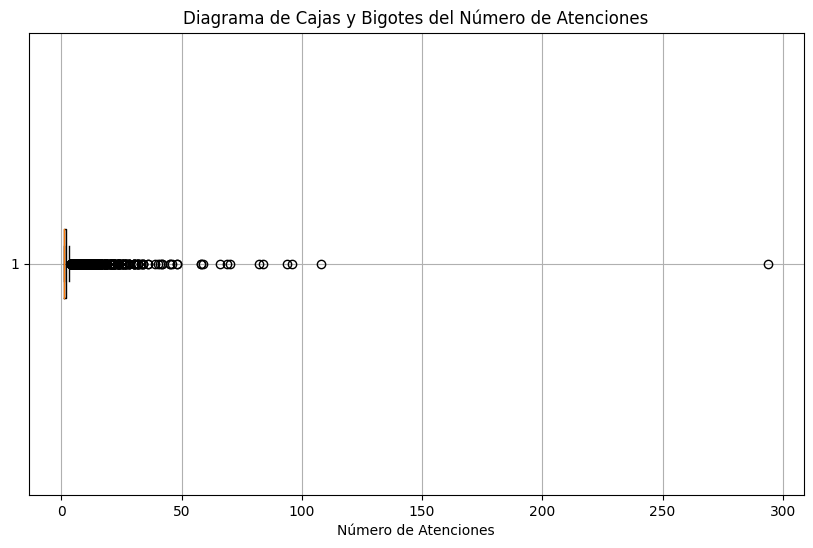

In [51]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

Dado que el número de atenciones no hace sentido con el número de pacientes se procede a eliminar

In [52]:
#Encontrar valor máximo
valor_maximo = df['Número de Atenciones'].max()
print(valor_maximo)

294


In [53]:
#Eliminar valor máximo
df = df[df['Número de Atenciones'] != valor_maximo]

In [54]:
#Reviso de nuevos los estadísticos
print(df['Número de Atenciones'].describe())

count    20006.000000
mean         2.189893
std          3.256168
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        108.000000
Name: Número de Atenciones, dtype: float64


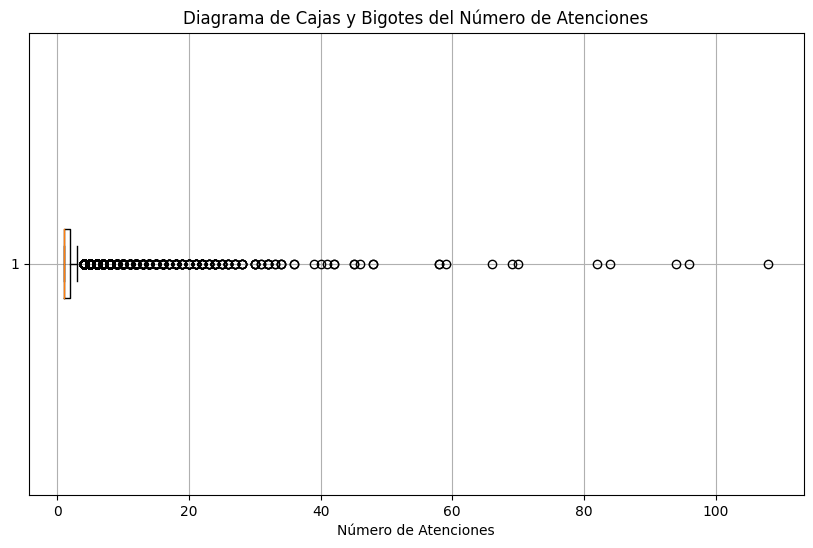

In [55]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [56]:
#Reviso el núevo valor máximo
fila_max_atenciones = df[df['Número de Atenciones'] ==df['Número de Atenciones'].max()]
print(fila_max_atenciones)

          Anno  Mes    Departamento        Municipio Administradora  \
356902  2022.0  8.0  66 - Risaralda  66001 - Pereira   EPS018 - SOS   

                                 Prestador  \
356902  660010021710 - CLINICA COMFAMILIAR   

                                       Procedimiento CUPS  \
356902  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...   

        Número de Atenciones  Número de Personas Atendidas  \
356902                   108                           4.0   

        Conteo de Prestadores  
356902                    1.0  


In [ ]:
Para un mejor manejo de los datos atípicos creo una relación entre atenciones y personas atentidadas

In [57]:
# Asegurarte de que estás trabajando con el DataFrame original
df.loc[:, 'Atenciones por Persona'] = df['Número de Atenciones'] / df['Número de Personas Atendidas']

# Contar las filas donde 'Atenciones por Persona' es mayor a 2
num_filas_mayores_a_2 = df[df['Atenciones por Persona'] > 2].shape[0]

# Mostrar el resultado
print(f"Hay {num_filas_mayores_a_2} filas donde 'Atenciones por Persona' es mayor a 2.")


Hay 1513 filas donde 'Atenciones por Persona' es mayor a 2.


In [58]:
# Eliminar las filas donde 'Atenciones por Persona' es mayor a 2
df = df[df['Atenciones por Persona'] <= 2]

In [59]:
#Reviso de nuevos los estadísticos
print(df['Número de Atenciones'].describe())

count    18493.000000
mean         1.863408
std          2.342543
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         82.000000
Name: Número de Atenciones, dtype: float64


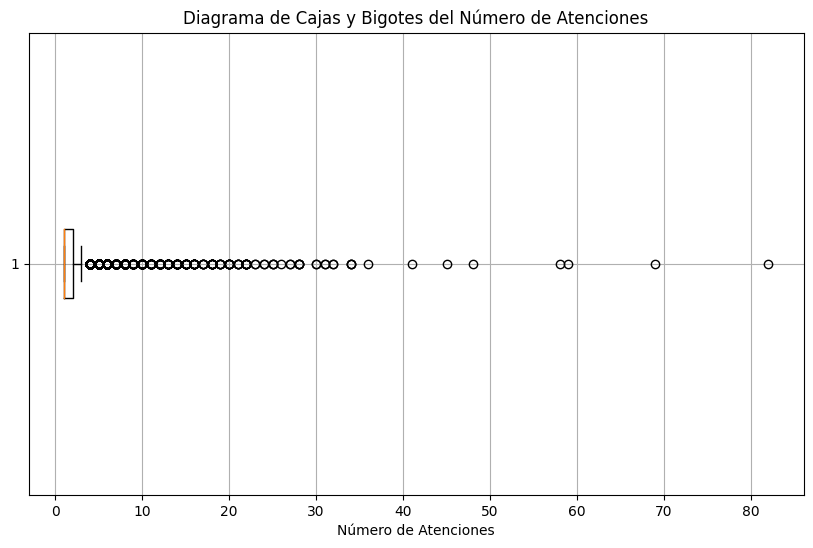

In [60]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [61]:
#Reviso el núevo valor máximo
fila_max_atenciones = df[df['Número de Atenciones'] ==df['Número de Atenciones'].max()]
print(fila_max_atenciones)

         Anno  Mes Departamento          Municipio     Administradora  \
60299  2021.0  4.0   70 - Sucre  70001 - Sincelejo  ESS133 - COMPARTA   

                                       Prestador  \
60299  700010036501 - CLINICA SALUD SOCIAL S.A.S   

                                      Procedimiento CUPS  \
60299  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...   

       Número de Atenciones  Número de Personas Atendidas  \
60299                    82                          73.0   

       Conteo de Prestadores  Atenciones por Persona  
60299                    1.0                1.123288  


**ANÁLISIS BIVARIADO**

Para el procedimiento objetivo angioplastia coronaria transluminal percutánea, se realiza en análisis de tendencia en número de procedimientos y pacientes atendidos

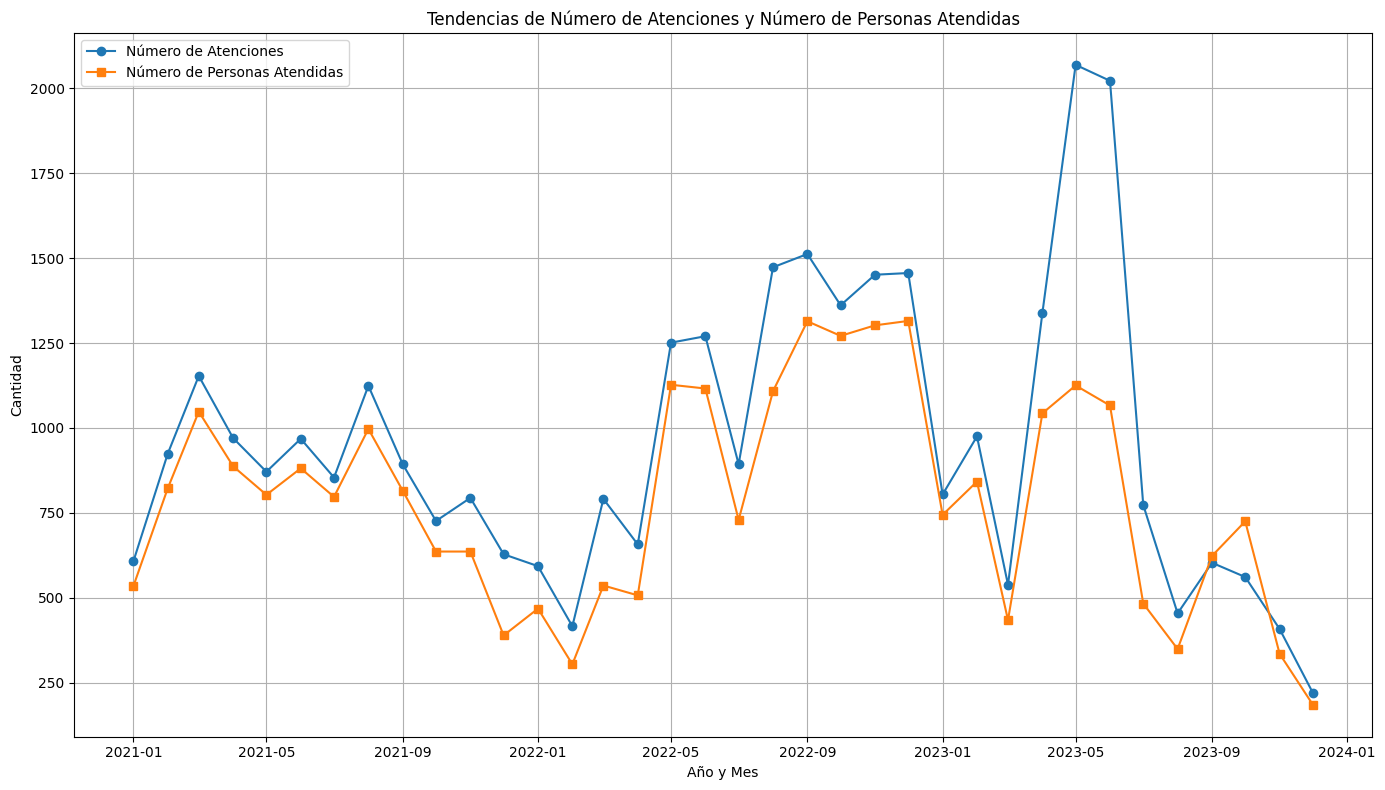

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para excluir el año 2024
df_filtrado = df[df['Anno'] != 2024].copy()

# Convertir 'Anno' y 'Mes' a enteros
df_filtrado['Anno'] = df_filtrado['Anno'].astype(int)
df_filtrado['Mes'] = df_filtrado['Mes'].astype(int)

# Crear una columna de fecha combinando 'Anno' y 'Mes'
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Anno'].astype(str) + '-' + df_filtrado['Mes'].astype(str) + '-01', format='%Y-%m-%d')

# Agrupar por la nueva columna 'Fecha' y sumar 'Número de Atenciones' y 'Número de Personas Atendidas'
df_agrupado = df_filtrado.groupby('Fecha').sum().reset_index()

# Crear la gráfica de líneas
plt.figure(figsize=(14, 8))

# Graficar 'Número de Atenciones'
plt.plot(df_agrupado['Fecha'], df_agrupado['Número de Atenciones'], label='Número de Atenciones', marker='o')

# Graficar 'Número de Personas Atendidas'
plt.plot(df_agrupado['Fecha'], df_agrupado['Número de Personas Atendidas'], label='Número de Personas Atendidas', marker='s')

# Personalizar la gráfica
plt.title('Tendencias de Número de Atenciones y Número de Personas Atendidas')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

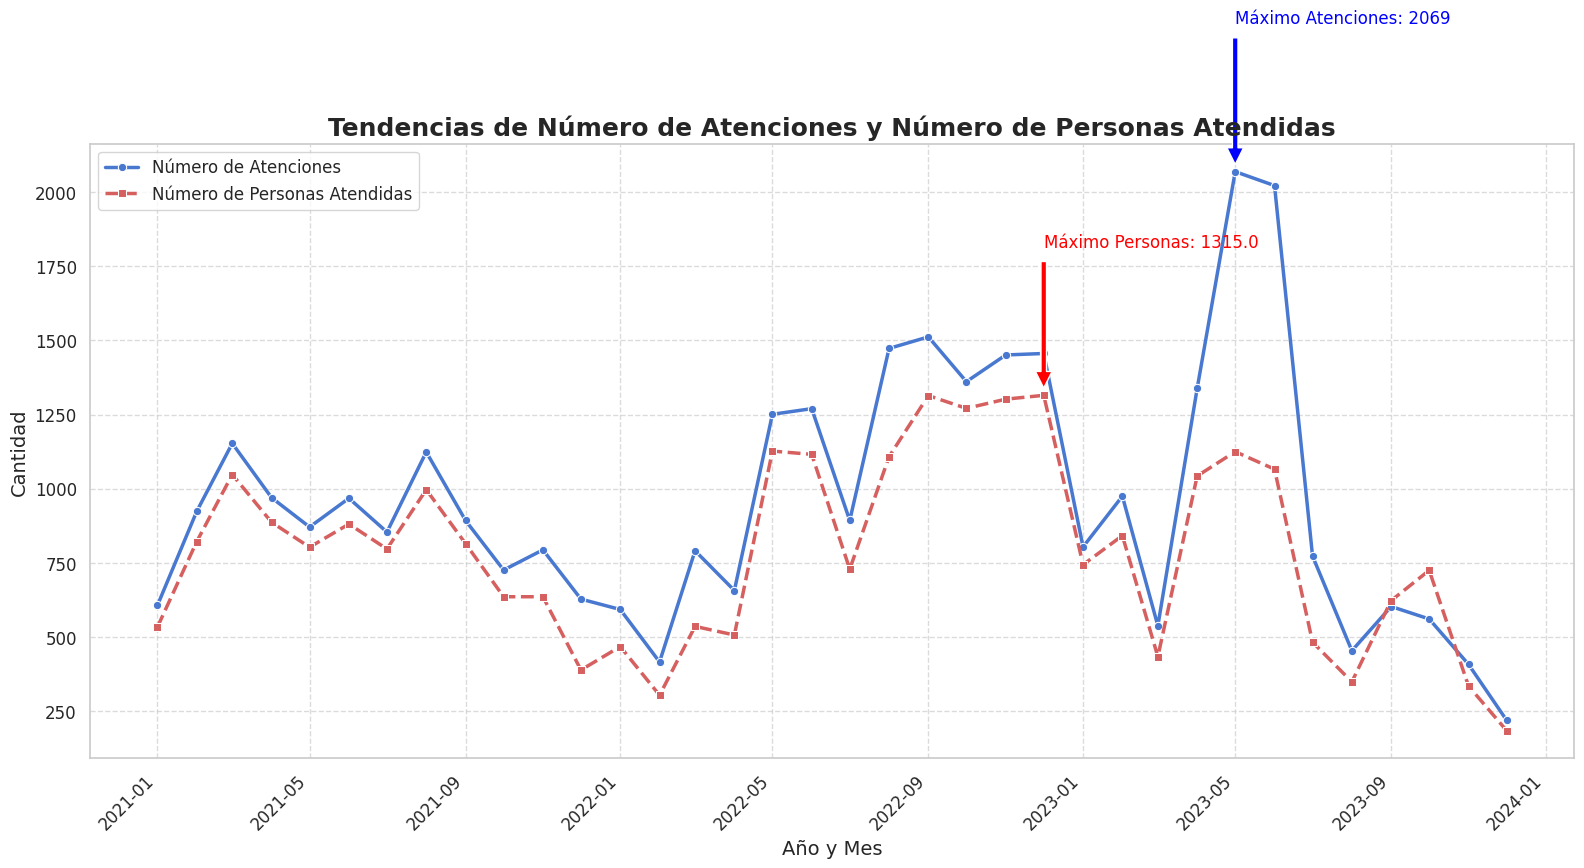

In [63]:

import seaborn as sns


# Filtrar el DataFrame para excluir el año 2024
df_filtrado = df[df['Anno'] != 2024].copy()

# Convertir 'Anno' y 'Mes' a enteros
df_filtrado['Anno'] = df_filtrado['Anno'].astype(int)
df_filtrado['Mes'] = df_filtrado['Mes'].astype(int)

# Crear una columna de fecha combinando 'Anno' y 'Mes'
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Anno'].astype(str) + '-' + df_filtrado['Mes'].astype(str) + '-01', format='%Y-%m-%d')

# Agrupar por la nueva columna 'Fecha' y sumar 'Número de Atenciones' y 'Número de Personas Atendidas'
df_agrupado = df_filtrado.groupby('Fecha').sum().reset_index()

# Configuración del estilo de la gráfica con Seaborn
sns.set(style="whitegrid", palette="muted")

# Crear la figura y los ejes con Seaborn
plt.figure(figsize=(16, 9))

# Graficar 'Número de Atenciones'
sns.lineplot(x='Fecha', y='Número de Atenciones', data=df_agrupado, label='Número de Atenciones', marker='o', color='b', linewidth=2.5)

# Graficar 'Número de Personas Atendidas'
sns.lineplot(x='Fecha', y='Número de Personas Atendidas', data=df_agrupado, label='Número de Personas Atendidas', marker='s', color='r', linestyle='--', linewidth=2.5)

# Añadir etiquetas y título
plt.title('Tendencias de Número de Atenciones y Número de Personas Atendidas', fontsize=18, fontweight='bold')
plt.xlabel('Año y Mes', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Personalizar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir anotaciones en los picos
max_atenciones = df_agrupado['Número de Atenciones'].max()
max_personas = df_agrupado['Número de Personas Atendidas'].max()

plt.annotate(f'Máximo Atenciones: {max_atenciones}',
             xy=(df_agrupado['Fecha'][df_agrupado['Número de Atenciones'].idxmax()], max_atenciones),
             xytext=(df_agrupado['Fecha'][df_agrupado['Número de Atenciones'].idxmax()], max_atenciones + 500),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, color='blue')

plt.annotate(f'Máximo Personas: {max_personas}',
             xy=(df_agrupado['Fecha'][df_agrupado['Número de Personas Atendidas'].idxmax()], max_personas),
             xytext=(df_agrupado['Fecha'][df_agrupado['Número de Personas Atendidas'].idxmax()], max_personas + 500),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
Ciudades con más atenciones

In [64]:
# Agrupar por Municipio (o la columna que representa la ciudad) y sumar el 'Número de Atenciones'
top_ciudades = df.groupby('Municipio')['Número de Atenciones'].sum().reset_index()

# Ordenar de forma descendente por 'Número de Atenciones'
top_ciudades = top_ciudades.sort_values(by='Número de Atenciones', ascending=False)

# Seleccionar el top 5
top_5_ciudades = top_ciudades.head(5)

# Mostrar el top 5
print(top_5_ciudades)

                Municipio  Número de Atenciones
130  11001 - Bogotá, D.C.                  5441
895          76001 - Cali                  1500
108  08001 - Barranquilla                  1335
744   68001 - Bucaramanga                   992
1        05001 - Medellín                   991


Comparativo por Ciudad

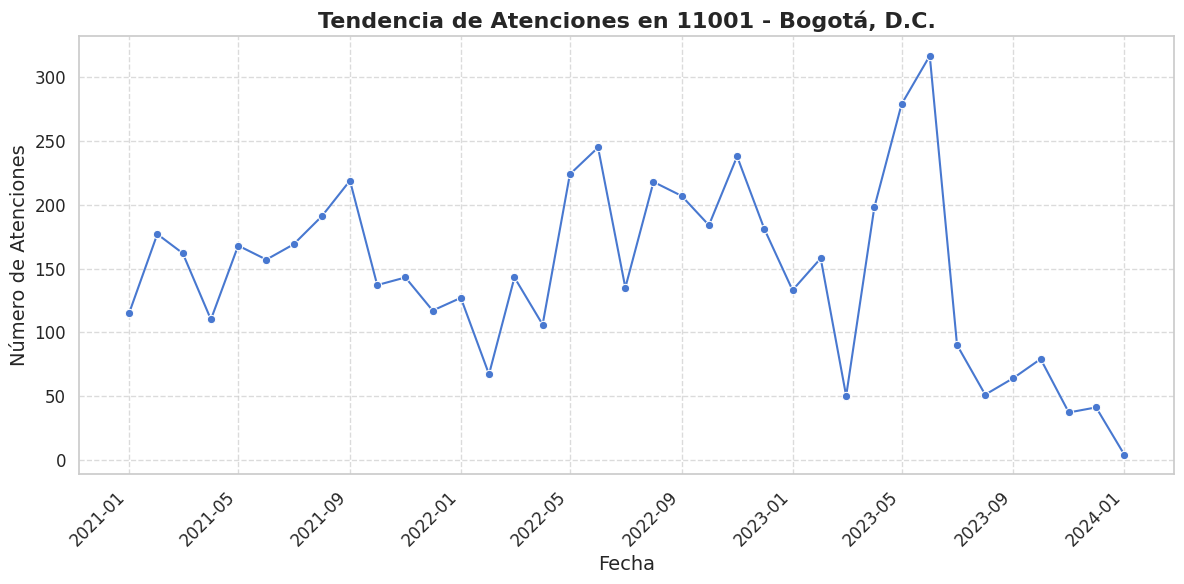

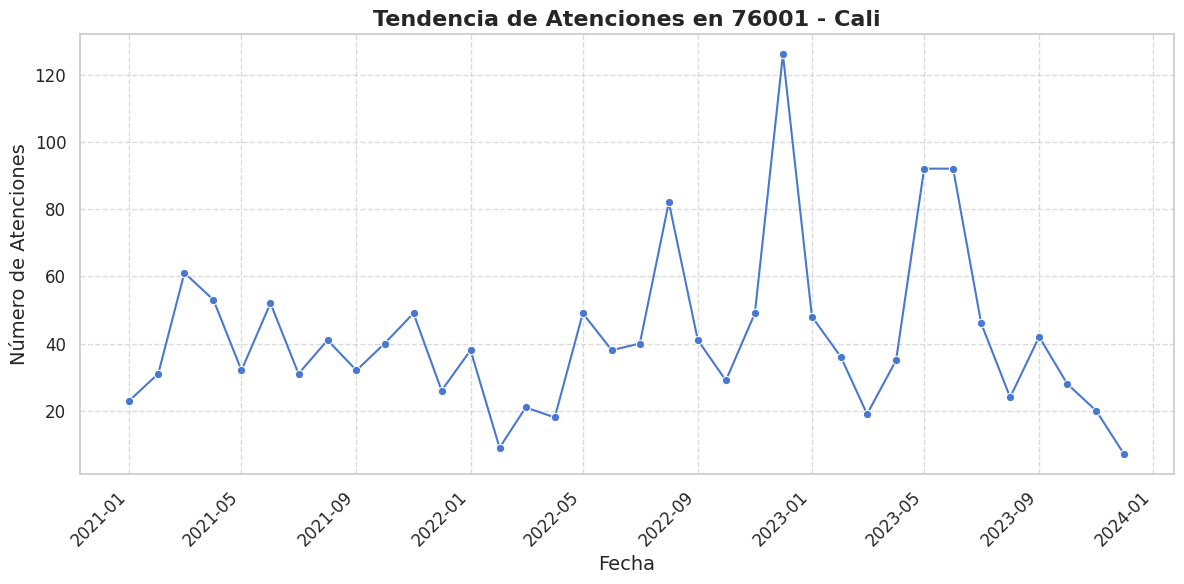

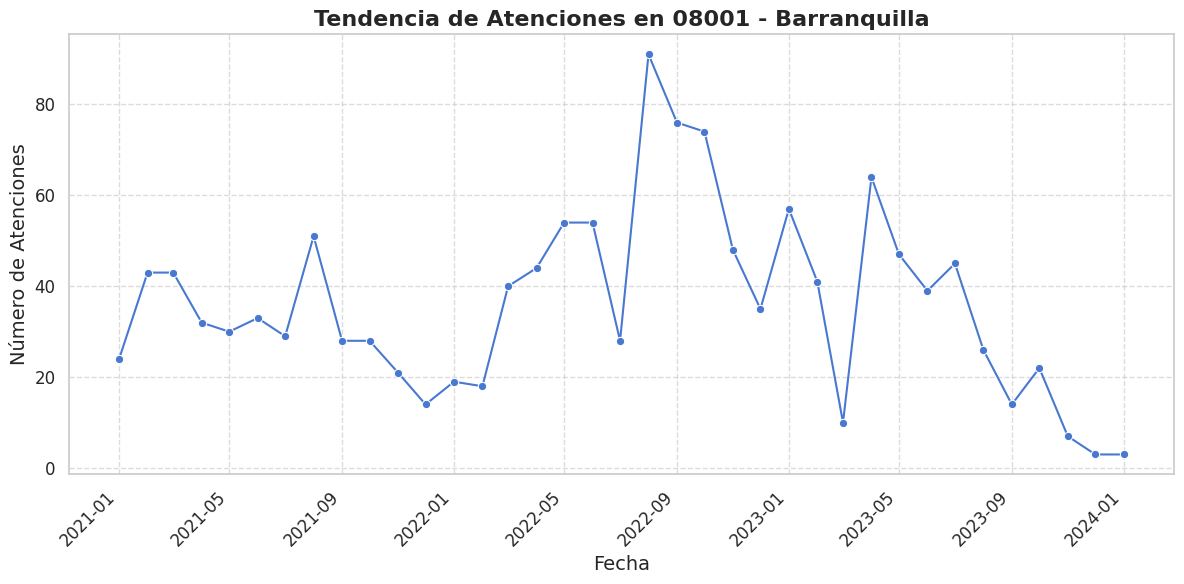

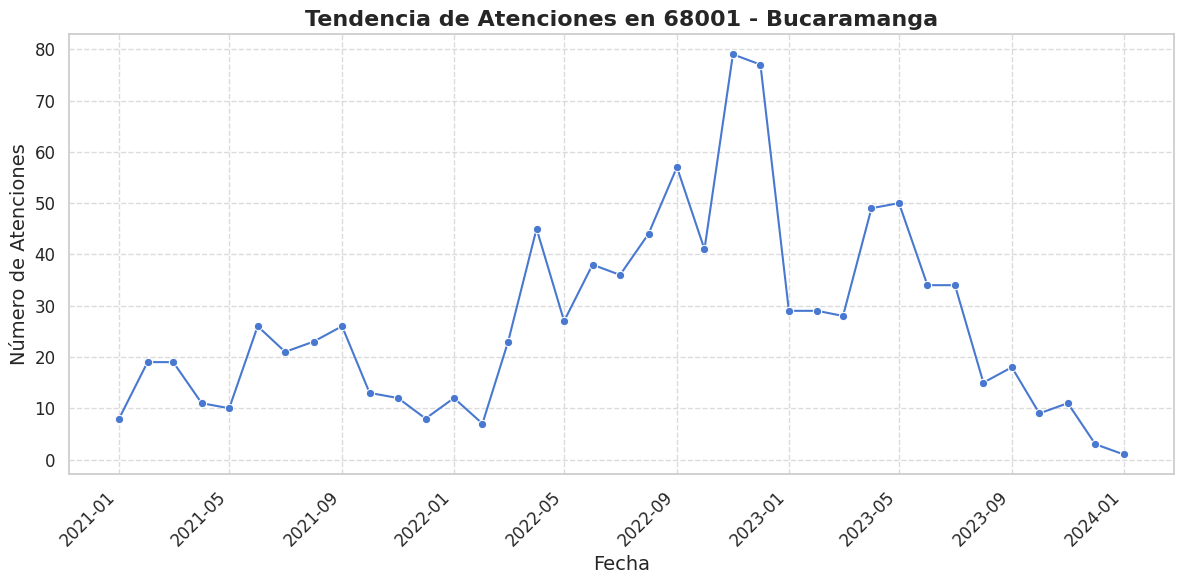

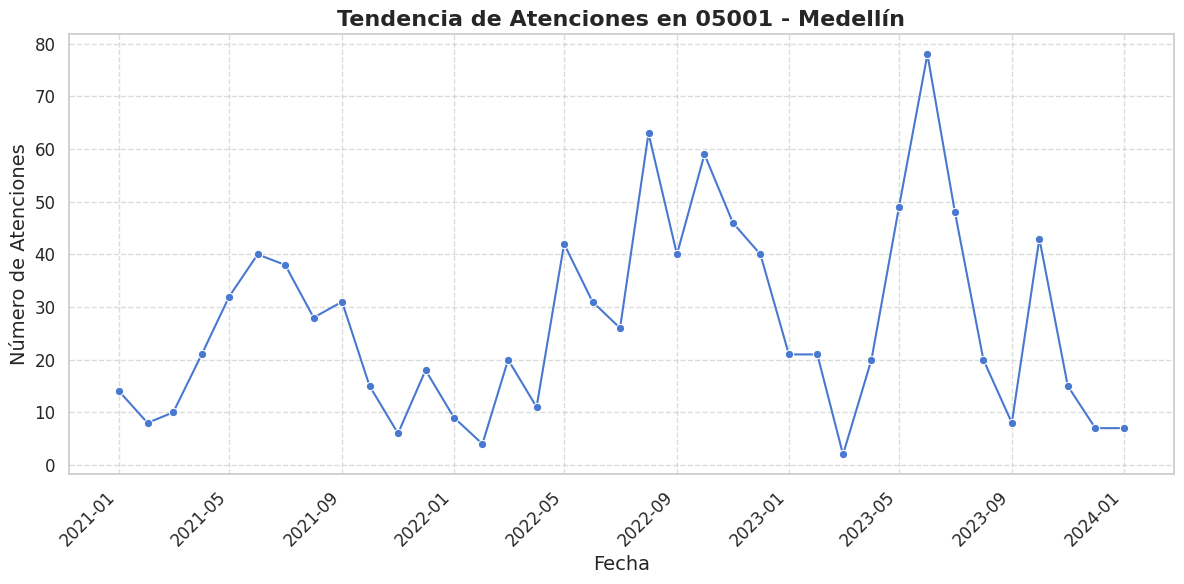

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por Municipio (o la columna que representa la ciudad) y sumar el 'Número de Atenciones'
top_ciudades = df.groupby('Municipio')['Número de Atenciones'].sum().reset_index()

# Ordenar de forma descendente por 'Número de Atenciones' y seleccionar el top 5
top_5_ciudades = top_ciudades.sort_values(by='Número de Atenciones', ascending=False).head(5)

# Filtrar el DataFrame original para incluir solo las ciudades del top 5
df_top_5 = df[df['Municipio'].isin(top_5_ciudades['Municipio'])]

# Crear una gráfica para cada ciudad usando Seaborn
for ciudad in top_5_ciudades['Municipio']:
    # Filtrar los datos para la ciudad actual
    df_ciudad = df_top_5[df_top_5['Municipio'] == ciudad].copy()

    # Convertir 'Anno' y 'Mes' a enteros
    df_ciudad['Anno'] = df_ciudad['Anno'].astype(int)
    df_ciudad['Mes'] = df_ciudad['Mes'].astype(int)

    # Crear una columna de fecha combinando 'Anno' y 'Mes'
    df_ciudad['Fecha'] = pd.to_datetime(df_ciudad['Anno'].astype(str) + '-' + df_ciudad['Mes'].astype(str) + '-01', format='%Y-%m-%d')

    # Agrupar por la nueva columna 'Fecha' y sumar 'Número de Atenciones'
    df_ciudad_agrupado = df_ciudad.groupby('Fecha')['Número de Atenciones'].sum().reset_index()

    # Crear la gráfica con Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Fecha', y='Número de Atenciones', data=df_ciudad_agrupado, marker='o', color='b')

    # Añadir título y etiquetas
    plt.title(f'Tendencia de Atenciones en {ciudad}', fontsize=16, fontweight='bold')
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Número de Atenciones', fontsize=14)

    # Personalizar las etiquetas del eje X
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Mostrar la cuadrícula
    plt.grid(True, linestyle='--', alpha=0.7)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

Número de Atenciones y Número de Personas atendidas

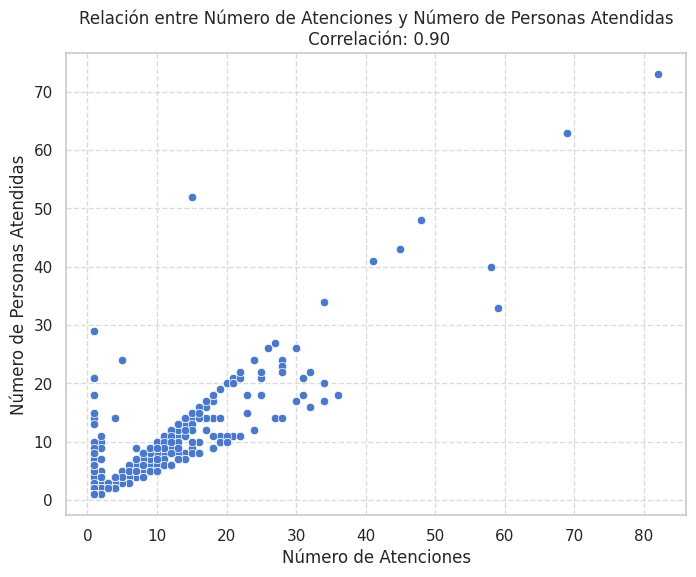

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación
correlacion = df[['Número de Atenciones', 'Número de Personas Atendidas']].corr()

# Visualizar la relación con un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Número de Atenciones', y='Número de Personas Atendidas', data=df)
plt.title(f'Relación entre Número de Atenciones y Número de Personas Atendidas\n Correlación: {correlacion.iloc[0,1]:.2f}')
plt.xlabel('Número de Atenciones')
plt.ylabel('Número de Personas Atendidas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Municipio y Número de atenciones

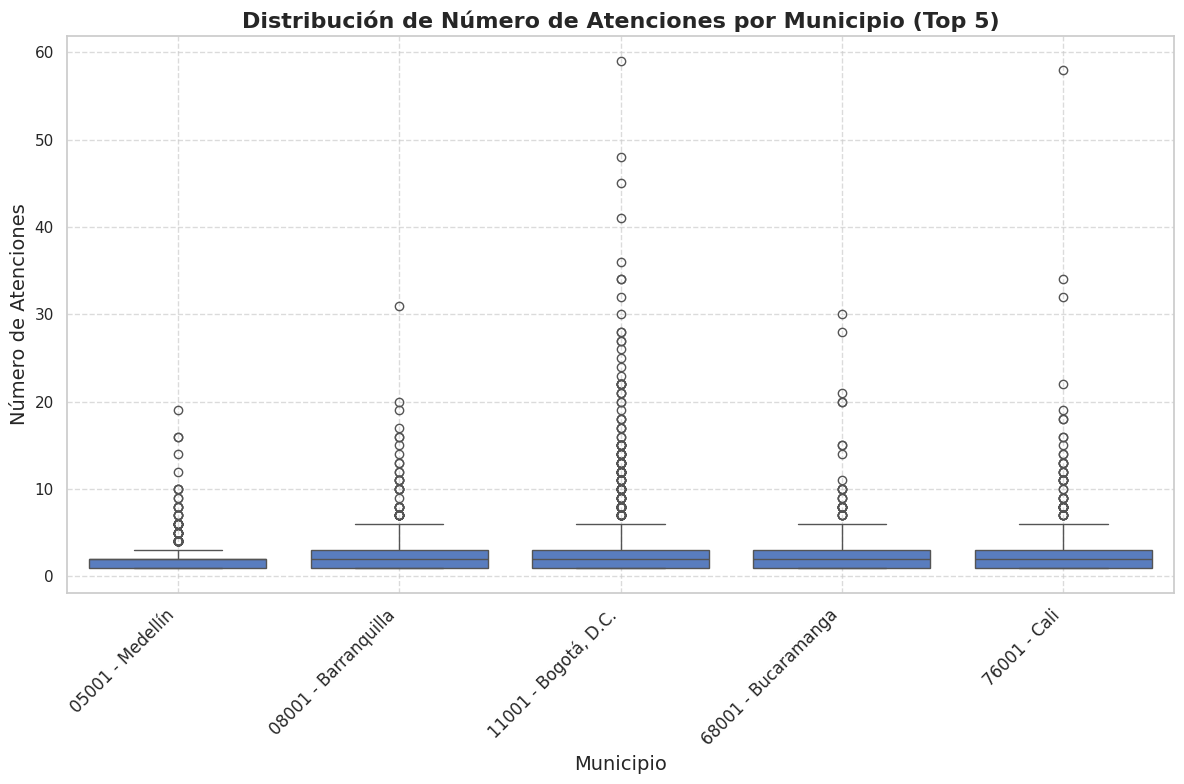

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame original para incluir solo las ciudades del top 5
df_top_5 = df[df['Municipio'].isin(top_5_ciudades['Municipio'])]

# Gráfico de caja para comparar la distribución de atenciones por municipio en el top 5
plt.figure(figsize=(12, 8))
sns.boxplot(x='Municipio', y='Número de Atenciones', data=df_top_5)

# Añadir título y etiquetas
plt.title('Distribución de Número de Atenciones por Municipio (Top 5)', fontsize=16, fontweight='bold')
plt.xlabel('Municipio', fontsize=14)
plt.ylabel('Número de Atenciones', fontsize=14)

# Personalizar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

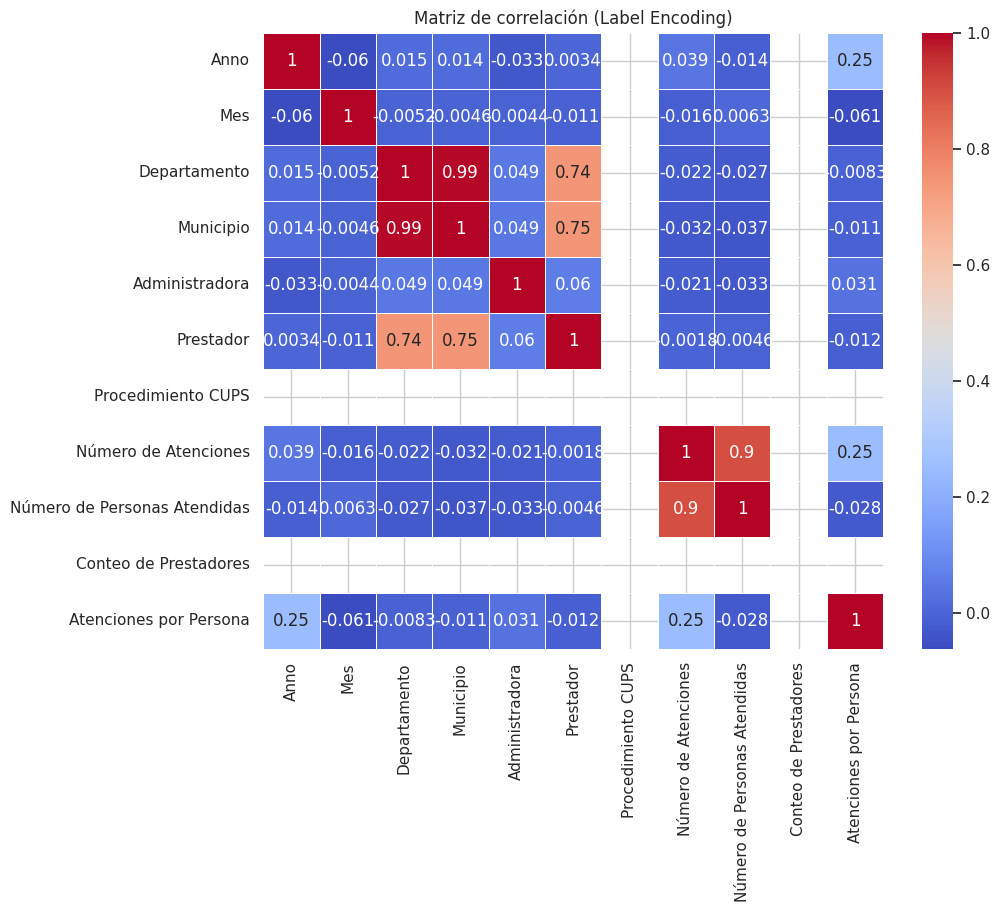

In [68]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para codificar
df_label_encoded = df.copy()

# Aplicar Label Encoding a las variables categóricas
label_encoders = {}
categorical_columns = ['Departamento', 'Municipio', 'Administradora', 'Prestador', 'Procedimiento CUPS']

for column in categorical_columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column])
    label_encoders[column] = le  # Guardar el codificador por si necesitas revertirlo

# Calcular la matriz de correlación
corr_matrix_label_encoded = df_label_encoded.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_label_encoded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación (Label Encoding)')
plt.show()

**CONCLUSIONES :**

**Análisis de Tendencia:**
Al final de cada año se identifica una caída de las atenciones y por lo tanto personas atendidas.
Al inicio de cada año hay una tendencia creciente en las atenciones

**Comparativo en el top 5 de las ciudades**

Hay un alza en las diferentes ciudades de los procedimientos realzizdos para el 2023


**Correlación Número de Atenciones y Número de Personas Atendidas:**
Correlación Alta --> Era de Esperarse
Distribución de los datos : Denso en la parte inferior, es decir, bajo número de atención al igual que personas atendidas
Aunque la correlación es alta a medidas que aumenta el número de atenciones, también aumenta la dispersión de puntos

***Atenciones por municipio:***
Bucaramanga tiene una distribución de atenciones similar, pero con menos outliers en comparación con las demás ciudades.
Bogotá D.C. y Cali parecen tener una mayor dispersión de outliers, con algunos valores que llegan hasta 30 o más atenciones en un solo caso.


***Correlaciones entre variables***

Correlacioenes Fuertes :
Número de Atenciones y Número de Personas Atendidas
Prestador y Municipio/Departamento
Redundancia de variables: La alta correlación entre Municipio y Departamento sugiere que podría haber redundancia en el uso de estas variables en un modelo predictivo. Es posible que solo una de ellas sea necesaria para capturar la misma información.




**TALLER 4**

**Posible modelos a usar de acuerdo a lo que se quiere predecir para determinar procesamiento a las columnas**

Como posiblemente se manejaran series temporales se realizará la siguiente prepraración para algunas de las columnas

* Creación de cáracteristica temporal con Año y Mes.

* Nomalizar: Normalizar "Número de Atenciones" para que el modelo pueda trabajar más fácilmente con los valores.

* Crear variable  lag para tener en cuenta el periodo-1.

* Aplicar Hot Encoding con la creación de variables

**Normalización de Datos**

Metodo : MinMaxScaler aplicado a Número de Atenciones

In [75]:
#Normalización Número de Atenciones y Número de personas Atendas
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Normalizar
df_top_5['Número de Atenciones'] = scaler.fit_transform(df_top_5[['Número de Atenciones']])
df_top_5['Número de Personas Atendidas'] = scaler.fit_transform(df_top_5[['Número de Personas Atendidas']])

print(df_top_5.head(2))

       Anno  Mes    Departamento         Municipio  \
108  2021.0  1.0  05 - Antioquia  05001 - Medellín   
246  2021.0  1.0  05 - Antioquia  05001 - Medellín   

                                       Administradora  \
108  EMP028 - SALUD COOMEVA  MEDICINA PREPAGADA S. A.   
246                                  EPS016 - COOMEVA   

                                         Prestador  \
108  050010209201 - CLINICA EL ROSARIO SEDE CENTRO   
246      050010217203 - CLINICA MEDELLIN OCCIDENTE   

                                    Procedimiento CUPS  Número de Atenciones  \
108  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...              0.000000   
246  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...              0.017241   

     Número de Personas Atendidas  Conteo de Prestadores  \
108                           0.0                    1.0   
246                           0.0                    1.0   

     Atenciones por Persona  
108                     1.0  
246                 

<ipython-input-75-77de043eaf36>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Número de Atenciones'] = scaler.fit_transform(df_top_5[['Número de Atenciones']])
<ipython-input-75-77de043eaf36>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Número de Personas Atendidas'] = scaler.fit_transform(df_top_5[['Número de Personas Atendidas']])


**Creación de carácteristica Fecha con Año y Mes**


In [79]:
print(df_top_5.dtypes)
print( df_top_5_['Anno'].unique())
print( df_top_5['Mes'].unique())

Anno                            float64
Mes                             float64
Departamento                     object
Municipio                        object
Administradora                   object
Prestador                        object
Procedimiento CUPS               object
Número de Atenciones              int64
Número de Personas Atendidas    float64
Conteo de Prestadores           float64
Atenciones por Persona          float64
dtype: object
[2021. 2022. 2023. 2024.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [83]:
# Convertir Anno y Mes a enteros
df['Anno'] = df['Anno'].astype(int)
df['Mes'] = df['Mes'].astype(int)

# Crear un DataFrame temporal con las columnas etiquetadas como 'year', 'month', 'day'
temp_df = df[['Anno', 'Mes']].rename(columns={'Anno': 'year', 'Mes': 'month'})
temp_df['day'] = 1  # Asignar el primer día del mes

# Generar las fechas combinando 'year', 'month' y 'day'
df['Fecha'] = pd.to_datetime(temp_df)

print(df.dtypes)

# Mostrar el DataFrame resultante
print(df.head(2))

Anno                                     int64
Mes                                      int64
Departamento                            object
Municipio                               object
Administradora                          object
Prestador                               object
Procedimiento CUPS                      object
Número de Atenciones                     int64
Número de Personas Atendidas           float64
Conteo de Prestadores                  float64
Atenciones por Persona                 float64
Fecha                           datetime64[ns]
dtype: object
     Anno  Mes    Departamento         Municipio  \
108  2021    1  05 - Antioquia  05001 - Medellín   
246  2021    1  05 - Antioquia  05001 - Medellín   

                                       Administradora  \
108  EMP028 - SALUD COOMEVA  MEDICINA PREPAGADA S. A.   
246                                  EPS016 - COOMEVA   

                                         Prestador  \
108  050010209201 - CLINICA EL ROSARIO 

**Creación de variable Lag, para tener periodo -1**

Se crea una columna que indica Número de Atenciones del mes anterior que podría ser utilizada en el modelo

In [96]:
df_top_5.loc[:, 'Número de Personas Atendidas Lag_1'] = df_top_5['Número de Personas Atendidas'].shift(1)

In [98]:
print(df_top_5.dtypes)

Anno                                  float64
Mes                                   float64
Departamento                           object
Municipio                              object
Administradora                         object
Prestador                              object
Procedimiento CUPS                     object
Número de Atenciones                  float64
Número de Personas Atendidas          float64
Conteo de Prestadores                 float64
Atenciones por Persona                float64
Número de Personas Atendidas Lag_1    float64
dtype: object


**Aplicación de OneHotEncode**
Para ayudar a posibles detecciones de estacionalidades

In [101]:
# Crear variables dummy para la columna "Mes"
df_dummies = pd.get_dummies(df_top_5, columns=['Mes'], prefix='Mes')

# Mostrar el DataFrame resultante con las variables dummy
print(df_dummies.head(1))

       Anno    Departamento         Municipio  \
108  2021.0  05 - Antioquia  05001 - Medellín   

                                       Administradora  \
108  EMP028 - SALUD COOMEVA  MEDICINA PREPAGADA S. A.   

                                         Prestador  \
108  050010209201 - CLINICA EL ROSARIO SEDE CENTRO   

                                    Procedimiento CUPS  Número de Atenciones  \
108  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...                   0.0   

     Número de Personas Atendidas  Conteo de Prestadores  \
108                           0.0                    1.0   

     Atenciones por Persona  ...  Mes_3.0  Mes_4.0  Mes_5.0  Mes_6.0  Mes_7.0  \
108                     1.0  ...    False    False    False    False    False   

     Mes_8.0  Mes_9.0  Mes_10.0  Mes_11.0  Mes_12.0  
108    False    False     False     False     False  

[1 rows x 23 columns]


**CONCLUSIONES TALLER 4:**

**Preparación de Datos en Python**

*Escalado de las Variables Numéricas*:Se utilizó MinMaxScaler de scikit-learn para escalar las columnas "Número de Atenciones" y "Número de Personas Atendidas". Esto era necesario para normalizar las variables y ponerlas en la misma escala, lo que ayuda a mejorar la eficiencia y precisión de los modelos de machine learning que dependen de la distancia.

*Creación de la variable fecha *: Con la variable "Fecha", se abrió la posibilidad de realizar análisis temporales más avanzados, como la detección de tendencias a largo plazo, análisis estacional, y la aplicación de técnicas de series temporales.

*Agregar variable Mes Lag 1 *:   El modelo podría capturar mejor las fluctuaciones y tendencias a corto plazo en el número de personas atendidas. Esto es especialmente útil en series temporales donde la correlación temporal es alta.

*Creación de Variables Dummy para la Estacionalidad*: Se convirtió la columna "Mes", en un principio se paso de Meses a números del 1 al 12, pero también se crearon  variables dummy mediante pd.get_dummies(). Esto permite que el modelo de predicción capture posibles patrones estacionales, como un aumento en las atenciones durante ciertos meses.
Se crean 12 nuevas columnas, una para cada mes, con valores binarios.

**Impacto en el posible Modelo**

*Escalado de Variables:* El escalado de las variables "Número de Atenciones" y "Número de Personas Atendidas" aseguró que los valores estuvieran en un rango similar, que puede contribuir a algortimos que calculan distancias, como KNN o redes neuronales. Esto probablemente mejorará la precisión del modelo al evitar que variables con magnitudes mayores dominen las predicciones.

*Variable Fecha :* La variable de tipo fecha "Fecha" es esencial para modelos que requieren un componente temporal, como ARIMA, Prophet o modelos de regresión temporal.

*Mes Lag 1 :* Podría permitir al modelo de predicción incorporar facilmente información temporal relevante

*Variables Dummy para Estacionalidad:* La introducción de variables dummy para los meses ayudó a capturar la estacionalidad en los datos.
